In [1]:
# import reuiqred libraries and data loader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from DataLoader import DataLoader
from DataProcessor import DataProcessor

Loader = DataLoader()

In [2]:
df = Loader.load_dataset("C:/Users/PcVip/Downloads/Network_dataset_10.csv", file_type="csv")

2025-08-25 02:15:59,418 - INFO - CSV file loaded successfully:          src_ip  src_port         dst_ip  dst_port proto service  duration  \
0  192.168.1.30      3050  192.168.1.194      3050   tcp       -  0.000074   
1  192.168.1.30      3050  192.168.1.194      3050   tcp       -  0.000010   
2  192.168.1.30      3050  192.168.1.194      3050   tcp       -  0.000014   
3  192.168.1.30      3050  192.168.1.193      3050   tcp       -  0.000014   
4  192.168.1.30      3050  192.168.1.194      3050   tcp       -  0.000018   

   src_bytes  dst_bytes conn_state  ...  http_response_body_len  \
0          0          0        REJ  ...                       0   
1          0          0        REJ  ...                       0   
2          0          0        REJ  ...                       0   
3          0          0        REJ  ...                       0   
4          0          0        REJ  ...                       0   

   http_status_code  http_user_agent  http_orig_mime_types  \
0  

In [3]:
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.30,3050,192.168.1.194,3050,tcp,-,0.000074,0,0,REJ,...,0,0,-,-,-,-,-,-,1,dos
1,192.168.1.30,3050,192.168.1.194,3050,tcp,-,0.000010,0,0,REJ,...,0,0,-,-,-,-,-,-,1,dos
2,192.168.1.30,3050,192.168.1.194,3050,tcp,-,0.000014,0,0,REJ,...,0,0,-,-,-,-,-,-,1,dos
3,192.168.1.30,3050,192.168.1.193,3050,tcp,-,0.000014,0,0,REJ,...,0,0,-,-,-,-,-,-,1,dos
4,192.168.1.30,3050,192.168.1.194,3050,tcp,-,0.000018,0,0,REJ,...,0,0,-,-,-,-,-,-,1,dos


In [4]:
df["type"].value_counts()

type
dos       969998
normal     30002
Name: count, dtype: int64

In [5]:
df = Loader.clean_dataset(df)

2025-08-25 02:16:00,363 - INFO - Dataset cleaned successfully. 460965 rows have been removed.


In [6]:
df["type"].value_counts()

type
dos       509082
normal     29953
Name: count, dtype: int64

In [7]:
# Show dataframe columns
df.columns

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_referrer', 'http_version',
       'http_request_body_len', 'http_response_body_len', 'http_status_code',
       'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types',
       'weird_name', 'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

In [8]:
# We take onlu the following columns
features = [
    "duration", 
    "src_bytes", "dst_bytes", 
    "src_pkts", "dst_pkts", 
    "src_ip_bytes", "dst_ip_bytes"
]

X = df[features]
y = df["label"].astype("Int64")

In [9]:
X.head()

,duration,src_bytes,dst_bytes,src_pkts,dst_pkts,src_ip_bytes,dst_ip_bytes
0,0.000074,0,0,1,1,40,40
1,0.000010,0,0,1,1,40,40
2,0.000014,0,0,1,1,40,40
3,0.000014,0,0,1,1,40,40
4,0.000018,0,0,1,1,40,40


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: Int64

In [11]:
for col in ["duration", "src_bytes", "dst_bytes", "src_pkts", "dst_pkts",
            "src_ip_bytes", "dst_ip_bytes"]:
    X[col] = pd.to_numeric(X[col], errors="coerce")

# divide categorial and numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

C:\Users\PcVip\AppData\Local\Temp\ipykernel_17624\3807666187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors="coerce")


In [12]:
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['duration', 'src_bytes', 'dst_bytes', 'src_pkts', 'dst_pkts', 'src_ip_bytes', 'dst_ip_bytes']
Categorical columns: []


In [13]:
# import data processor
processor = DataProcessor(num_cols=num_cols, cat_cols=cat_cols)

In [14]:
from sklearn.model_selection import StratifiedKFold
# Define the outer and inner cross-validation strategies
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [15]:
"""
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    f1_score, roc_auc_score, average_precision_score,
    matthews_corrcoef, brier_score_loss, confusion_matrix,
    classification_report
)
from sklearn.base import clone
import numpy as np
import pandas as pd

best_models = {
    "XGBoost": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=4)),
        ("clf", XGBClassifier(eval_metric="logloss", n_estimators=100, max_depth=5, learning_rate=0.1))
    ]),
    "RandomForest": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=4)),
        ("clf", RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2))
    ]),
    "MLPClassifier": Pipeline([
        ("pre", DataProcessor(num_cols, cat_cols)),
        ("select", SelectKBest(score_func=f_classif, k=5)),
        ("clf", MLPClassifier(hidden_layer_sizes=(50,), activation="relu", alpha=0.0001, max_iter=500, random_state=42))
    ])
}

results = []
for model_name, pipeline in best_models.items():
    print(f"\nEvaluando {model_name}...")

    outer_scores = {"f1": [], "roc_auc": [], "auprc": [], "mcc": [], "brier": [], "fnr": []}
    confusion_matrixes, classification_reports = [], []
    selected_features_folds = []

    for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = clone(pipeline)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        outer_scores["f1"].append(f1_score(y_test, y_pred))
        outer_scores["roc_auc"].append(roc_auc_score(y_test, y_proba))
        outer_scores["auprc"].append(average_precision_score(y_test, y_proba))
        outer_scores["mcc"].append(matthews_corrcoef(y_test, y_pred))
        outer_scores["brier"].append(brier_score_loss(y_test, y_proba))

        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        tn, fp, fn, tp = cm.ravel()
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        outer_scores["fnr"].append(fnr)
        confusion_matrixes.append(cm)

        report = classification_report(
            y_test, y_pred,
            target_names=["Benigno (0)", "Malicioso (1)"],
            output_dict=True
        )
        classification_reports.append(report)

        # === Guardar features seleccionadas en este fold ===
        select_step = model.named_steps["select"]
        feature_names = model.named_steps["pre"].get_feature_names_out()
        selected_mask = select_step.get_support()
        selected_features = feature_names[selected_mask]
        selected_features_folds.append(list(selected_features))

    results.append({
        "Modelo": model_name,
        "F1": f"{np.mean(outer_scores['f1']):.3f} ± {np.std(outer_scores['f1']):.3f}",
        "ROC-AUC": f"{np.mean(outer_scores['roc_auc']):.3f} ± {np.std(outer_scores['roc_auc']):.3f}",
        "AUPRC": f"{np.mean(outer_scores['auprc']):.3f} ± {np.std(outer_scores['auprc']):.3f}",
        "MCC": f"{np.mean(outer_scores['mcc']):.3f} ± {np.std(outer_scores['mcc']):.3f}",
        "Brier": f"{np.mean(outer_scores['brier']):.3f} ± {np.std(outer_scores['brier']):.3f}",
        "FNR": f"{np.mean(outer_scores['fnr']):.3f} ± {np.std(outer_scores['fnr']):.3f}",
        "ConfusionMatrix_por_fold": confusion_matrixes,
        "ClassificationReport_por_fold": classification_reports,
        "BestFeatures_por_fold": selected_features_folds
    })

df_results = pd.DataFrame(results)
print("\nResultados finales:")
print(df_results[["Modelo", "F1", "ROC-AUC", "AUPRC", "MCC", "Brier", "FNR"]])

# === Contar qué features se repiten más por modelo ===
for _, row in df_results.iterrows():
    modelo = row["Modelo"]
    features_folds = row["BestFeatures_por_fold"]
    all_feats = [feat for fold_feats in features_folds for feat in fold_feats]
    feat_counts = pd.Series(all_feats).value_counts()
    print(f"\n{modelo} - Features más seleccionadas:")
    print(feat_counts)
"""

'\nimport warnings\nwarnings.filterwarnings("ignore", category=UserWarning)\nwarnings.filterwarnings("ignore", category=RuntimeWarning)\n\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.feature_selection import SelectKBest, f_classif\nfrom xgboost import XGBClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.metrics import (\n    f1_score, roc_auc_score, average_precision_score,\n    matthews_corrcoef, brier_score_loss, confusion_matrix,\n    classification_report\n)\nfrom sklearn.base import clone\nimport numpy as np\nimport pandas as pd\n\nbest_models = {\n    "XGBoost": Pipeline([\n        ("pre", DataProcessor(num_cols, cat_cols)),\n        ("select", SelectKBest(score_func=f_classif, k=4)),\n        ("clf", XGBClassifier(eval_metric="logloss", n_estimators=100, max_depth=5, learning_rate=0.1))\n    ]),\n    "RandomForest": Pipeline([\n        ("pre", DataProcessor(num_cols, cat_cols)),\n        ("sele

In [16]:
df_prep = df.copy()

In [17]:
num_features = ["duration","src_bytes","dst_bytes",
                "src_pkts","dst_pkts","src_ip_bytes","dst_ip_bytes"]
cat_features = ["proto","conn_state","service"]

In [18]:
for col in num_features:
    df_prep[col] = pd.to_numeric(df_prep[col], errors="coerce").fillna(0)

In [19]:
scaler = StandardScaler()
X_num = scaler.fit_transform(df_prep[num_features])


In [20]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = ohe.fit_transform(df_prep[cat_features].astype(str))



In [21]:
print(X_num.shape, X_cat.shape)
# Ej: (10000, 7) (10000, 25)


(539035, 7) (539035, 18)


In [22]:
X_num = np.array(X_num)
X_cat = np.array(X_cat)

print(X_num.shape, X_cat.shape, type(X_num), type(X_cat))

X_all = np.array(X_num, dtype=np.float32)

y_all = df_prep["label"].values

(539035, 7) (539035, 18) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [23]:
def create_sequences(X, y, window_size=10):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:(i + window_size)])
        ys.append(y[i + window_size])  # etiqueta del último elemento
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_all, y_all, window_size=10)

print("Shape secuencias:", X_seq.shape, y_seq.shape)

Shape secuencias: (539025, 10, 7) (539025,)


In [24]:
import numpy as np
unique, counts = np.unique(y_seq, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(29953), np.int64(1): np.int64(509072)}


In [25]:
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]


In [26]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
print(class_weights)




model = Sequential([
    GRU(64, input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=256,
    class_weight=class_weights
)


{np.int64(0): np.float64(9.121330061764954), np.int64(1): np.float64(0.5289978458322497)}
Epoch 1/5


c:\Users\PcVip\deteccion-botnets-tfm\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1685/1685 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8703 - loss: 0.5043 - val_accuracy: 0.8803 - val_loss: 0.4753
Epoch 2/5
1685/1685 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8826 - loss: 0.4921 - val_accuracy: 0.8652 - val_loss: 0.5222
Epoch 3/5
1685/1685 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8871 - loss: 0.4864 - val_accuracy: 0.8742 - val_loss: 0.5199
Epoch 4/5
1685/1685 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8885 - loss: 0.4834 - val_accuracy: 0.8784 - val_loss: 0.4812
Epoch 5/5
1685/1685 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8907 - loss: 0.4820 - val_accuracy: 0.8730 - val_loss: 0.4737


In [27]:
# Probabilidades
y_proba = model.predict(X_test, batch_size=256)

# Convertir a 0/1 con umbral 0.5
y_pred = (y_proba > 0.75).astype("int32").flatten()


422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[[  6298     17]
 [100853    637]]
              precision    recall  f1-score   support

           0     0.0588    0.9973    0.1110      6315
           1     0.9740    0.0063    0.0125    101490

    accuracy                         0.0643    107805
   macro avg     0.5164    0.5018    0.0617    107805
weighted avg     0.9204    0.0643    0.0182    107805

ROC-AUC: 0.8169016413943719


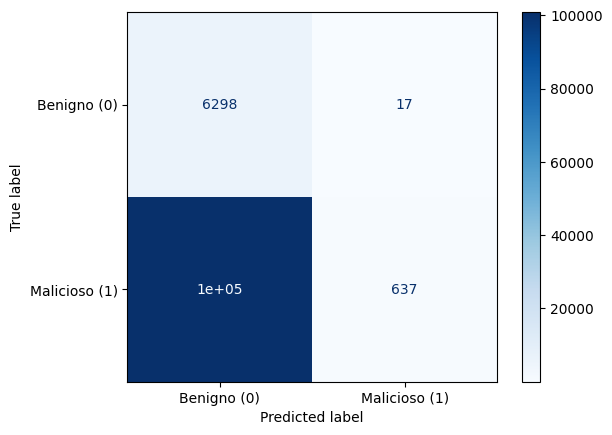

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
# display the confusion matrix with ConfussionMatrxixDisplay
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno (0)", "Malicioso (1)"])
disp.plot(cmap=plt.cm.Blues)

In [29]:
import numpy as np
import pandas as pd
from sklearn.utils import resample, class_weight
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, matthews_corrcoef
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# ============================
# Balanceo del dataset
# ============================
# Aplano para poder hacer oversampling
X_train_flat = X_train.reshape(X_train.shape[0], -1)
df_train = pd.DataFrame(X_train_flat)
df_train["label"] = y_train

# Separar clases
df_majority = df_train[df_train.label == 1]
df_minority = df_train[df_train.label == 0]

print("Antes del balanceo:", len(df_majority), "ataques,", len(df_minority), "normales")

# Oversample clase 0
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

# Dataset balanceado
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Reconstruir arrays
y_train_bal = df_balanced["label"].values
X_train_bal = df_balanced.drop(columns=["label"]).values.reshape(-1, X_train.shape[1], X_train.shape[2])

print("Después del balanceo:", np.bincount(y_train_bal))

# ============================
# Pesos de clase (por si queda algo de desbalanceo)
# ============================
classes = np.unique(y_train_bal)
weights = class_weight.compute_class_weight(class_weight="balanced", classes=classes, y=y_train_bal)
class_weights = dict(zip(classes, weights))
print("Class weights:", class_weights)

# ============================
# Modelo GRU
# ============================
model = Sequential([
    GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train_bal, y_train_bal,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=256,
    class_weight=class_weights,
    verbose=1
)

# ============================
# Evaluación
# ============================
y_proba = model.predict(X_test, batch_size=256)
y_pred = (y_proba > 0.5).astype("int32").flatten()

print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("F1:", f1_score(y_test, y_pred))
print("MCC:", matthews_corrcoef(y_test, y_pred))



Antes del balanceo: 407582 ataques, 23638 normales
Después del balanceo: [407582 407582]
Class weights: {np.int64(0): np.float64(1.0), np.int64(1): np.float64(1.0)}


c:\Users\PcVip\deteccion-botnets-tfm\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7749 - loss: 0.4940 - val_accuracy: 0.8808 - val_loss: 0.4616
Epoch 2/5
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7835 - loss: 0.4815 - val_accuracy: 0.8904 - val_loss: 0.4512
Epoch 3/5
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7848 - loss: 0.4781 - val_accuracy: 0.8799 - val_loss: 0.4404
Epoch 4/5
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7867 - loss: 0.4751 - val_accuracy: 0.8905 - val_loss: 0.4372
Epoch 5/5
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7885 - loss: 0.4727 - val_accuracy: 0.8939 - val_loss: 0.4417
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Confusion matrix:
 [[ 4146  2169]
 [ 9266 92224]]

Classification report:
               precision    recall  f1-score   support

           0     0.3091    0.6565    0.4203      6315
           1     0.9770    0.9087    0.9416    101490

    accuracy                         0.8939    107805
   macro avg   

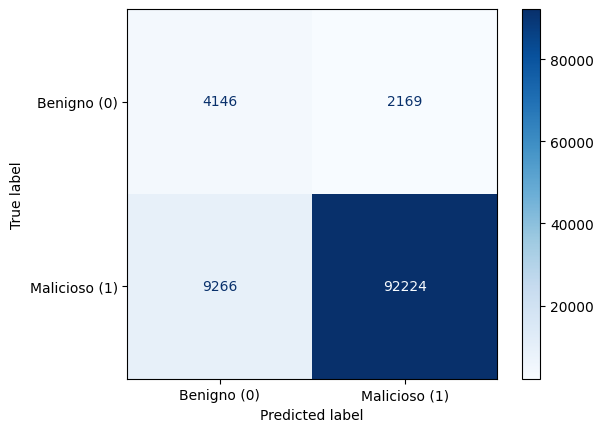

In [30]:
# Confussion matrix display of y_pred and y_test
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix with ConfussionMatrxixDisplay
# Display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno (0)", "Malicioso (1)"])
disp.plot(cmap=plt.cm.Blues)

In [31]:
! pip install imbalanced-learn
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# ============================
# SMOTE para balancear dataset
# ============================
print("Original balance:", np.bincount(y_train))

# Flatten para SMOTE
n_samples, timesteps, n_features = X_train.shape
X_train_flat = X_train.reshape((n_samples, timesteps * n_features))

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_flat, y_train)

# Reconstruir 3D para GRU
X_train_bal = X_train_bal.reshape((-1, timesteps, n_features))
print("Balance después de SMOTE:", np.bincount(y_train_bal))

# ============================
# Focal Loss
# ============================
def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        pt = tf.exp(-bce)
        return alpha * (1 - pt) ** gamma * bce
    return loss

# ============================
# Modelo GRU
# ============================
model = Sequential([
    GRU(64, input_shape=(timesteps, n_features)),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(1e-3),
    loss=focal_loss(gamma=2., alpha=0.75),
    metrics=["accuracy"]
)

history = model.fit(
    X_train_bal, y_train_bal,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=256,
    verbose=1
)

# ============================
# Evaluación
# ============================
y_proba = model.predict(X_test, batch_size=256)
y_pred = (y_proba > 0.5).astype("int32").flatten()

# Print metrics AUPRC
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("F1:", f1_score(y_test, y_pred))
print("MCC:", matthews_corrcoef(y_test, y_pred))
print("AUPRC:", average_precision_score(y_test, y_proba))

# ============================
# Visualizar matriz de confusión
# ============================
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal (0)","Ataque (1)"], yticklabels=["Normal (0)","Ataque (1)"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - GRU + SMOTE + Focal Loss")
plt.show()


Original balance: [ 23638 407582]
Balance después de SMOTE: [407582 407582]
Epoch 1/5


c:\Users\PcVip\deteccion-botnets-tfm\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3185/3185 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7740 - loss: 0.0955 - val_accuracy: 0.9011 - val_loss: 0.0834
Epoch 2/5
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7837 - loss: 0.0924 - val_accuracy: 0.8989 - val_loss: 0.0891
Epoch 3/5
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7872 - loss: 0.0909 - val_accuracy: 0.8930 - val_loss: 0.0913
Epoch 4/5
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7909 - loss: 0.0897 - val_accuracy: 0.8902 - val_loss: 0.0906
Epoch 5/5
3185/3185 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7960 - loss: 0.0875 - val_accuracy: 0.9202 - val_loss: 0.0829
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Confusion matrix:
 [[ 3744  2571]
 [ 6033 95457]]

Classification report:
               precision    recall  f1-score   support

           0     0.3829    0.5929    0.4653      6315
           1     0.9738    0.9406    0.9569    101490

    accuracy                         0.9202    107805
   macro avg     0.6784  

NameError: name 'average_precision_score' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
# Flatten para SMOTE
n_samples, timesteps, n_features = X_train.shape
X_train_flat = X_train.reshape((n_samples, timesteps * n_features))

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_flat, y_train)

# Reconstruir 3D para GRU
X_train_bal = X_train_bal.reshape((-1, timesteps, n_features))
print("Balance después de SMOTE:", np.bincount(y_train_bal))

def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        pt = tf.exp(-bce)
        return alpha * (1 - pt) ** gamma * bce
    return loss


model = Sequential([
    GRU(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3,
        input_shape=(X_train_bal.shape[1], X_train_bal.shape[2])),
    GRU(32, dropout=0.3, recurrent_dropout=0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(1e-3),
    loss=focal_loss(gamma=2., alpha=0.75),  # puedes probar focal loss aquí
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

early_stop = EarlyStopping(monitor="val_auc", patience=5, restore_best_weights=True)

history = model.fit(
    X_train_bal, y_train_bal,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=256,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

In [ ]:
y_proba = model.predict(X_test, batch_size=256)
y_pred = (y_proba > 0.5).astype("int32").flatten()

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("F1:", f1_score(y_test, y_pred))
print("MCC:", matthews_corrcoef(y_test, y_pred))

# ============================
# Visualizar matriz de confusión
# ============================
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal (0)","Ataque (1)"], yticklabels=["Normal (0)","Ataque (1)"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - GRU + SMOTE + Focal Loss")
plt.show()